In this step, I load the housing dataset to start exploring the data and understand the available features.

In [86]:
import pandas as pd

df_train = pd.read_csv("/content/train(1)(train(1)).csv")
df_test = pd.read_csv("/content/test2(test(1)).csv")
df_train.shape, df_test.shape


((16209, 21), (5404, 20))

I check the number of rows, columns, data types, and missing values to understand the overall data quality.

In [87]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

From the data overview, I observe that the date column is stored as text.Instead of using the raw date text, I extract meaningful time information such as year and month.

In [88]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train['sale_year'] = df_train['date'].dt.year
df_train['sale_month'] = df_train['date'].dt.month
df_test['sale_year'] = df_test['date'].dt.year
df_test['sale_month'] = df_test['date'].dt.month


In [89]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,9117000170,2015-05-05,268643,4,2.25,1810,9240,2.0,0,0,...,0,1961,0,98055,47.4362,-122.187,1660,9240,2015,5
1,6700390210,2014-07-08,245000,3,2.50,1600,2788,2.0,0,0,...,0,1992,0,98031,47.4034,-122.187,1720,3605,2014,7
2,7212660540,2015-01-15,200000,4,2.50,1720,8638,2.0,0,0,...,0,1994,0,98003,47.2704,-122.313,1870,7455,2015,1
3,8562780200,2015-04-27,352499,2,2.25,1240,705,2.0,0,0,...,90,2009,0,98027,47.5321,-122.073,1240,750,2015,4
4,7760400350,2014-12-05,232000,3,2.00,1280,13356,1.0,0,0,...,0,1994,0,98042,47.3715,-122.074,1590,8071,2014,12


In [90]:
df_train.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
count,1.620900e+04,16209,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,...,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,2014-10-29 00:18:12.726263040,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,...,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707,2014.321982,6.581159
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,...,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000,2014.000000,4.000000
50%,3.904950e+09,2014-10-16 00:00:00,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.304301e+09,2015-02-17 00:00:00,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,...,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000,2015.000000,9.000000
max,9.900000e+09,2015-05-24 00:00:00,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000
std,2.874661e+09,NaN,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,...,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012,0.467250,3.113352


From the price distribution plot, I observe that most properties are priced in the lower to mid range. A small number of properties have very high prices, creating a long right tail. This indicates that the price distribution is right-skewed.

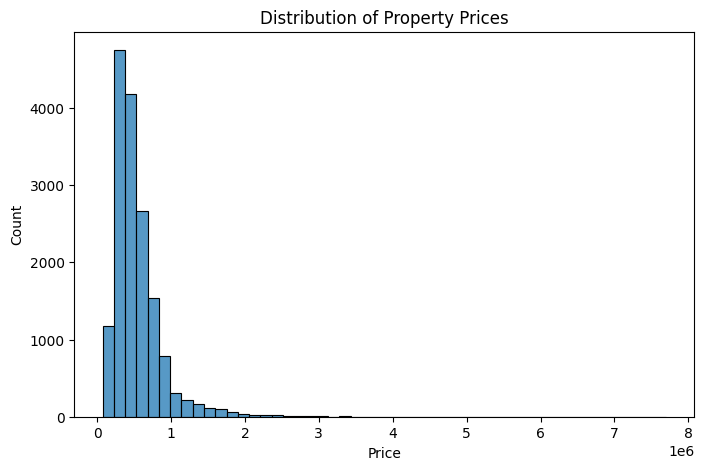

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_train['price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Property Prices")
plt.show()


From the scatter plot, I observe a positive relationship between living area and property price. As the living area increases, the price generally increases. However, there is a wide spread in prices for similar living areas, indicating that factors other than size such as location and neighborhood characteristics also play an important role in determining property value.

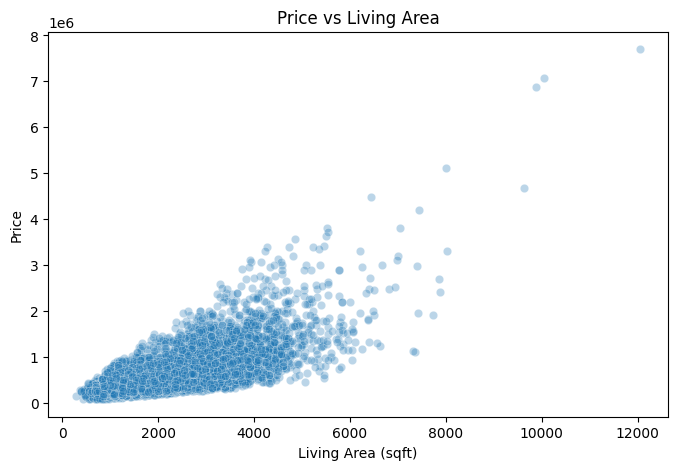

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df_train['sqft_living'],
    y=df_train['price'],
    alpha=0.3
)
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Price vs Living Area")
plt.show()


The median property price generally increases as the number of bedrooms increases. However, there is significant overlap in price ranges across different bedroom counts. Some properties with fewer bedrooms are priced higher than properties with more bedrooms, indicating that the number of bedrooms alone does not determine property value.

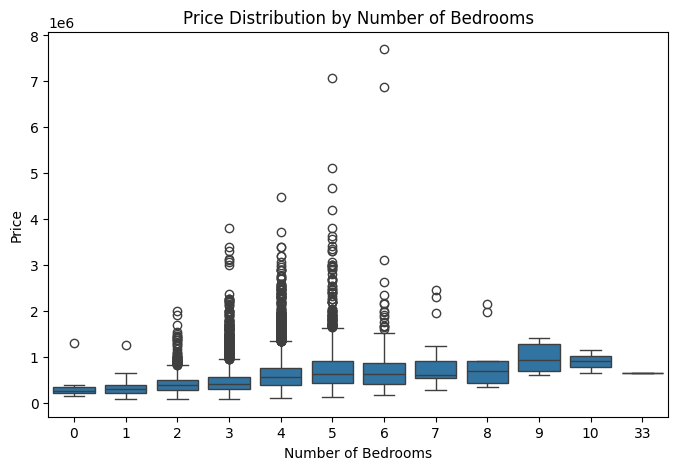

In [93]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['bedrooms'], y=df_train['price'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Bedrooms")
plt.show()


The geographic plot shows clear spatial patterns in property prices. High-priced properties are concentrated in specific regions, while other areas consistently have lower prices. This indicates that location plays a major role in determining property value, and nearby properties tend to have similar price ranges.

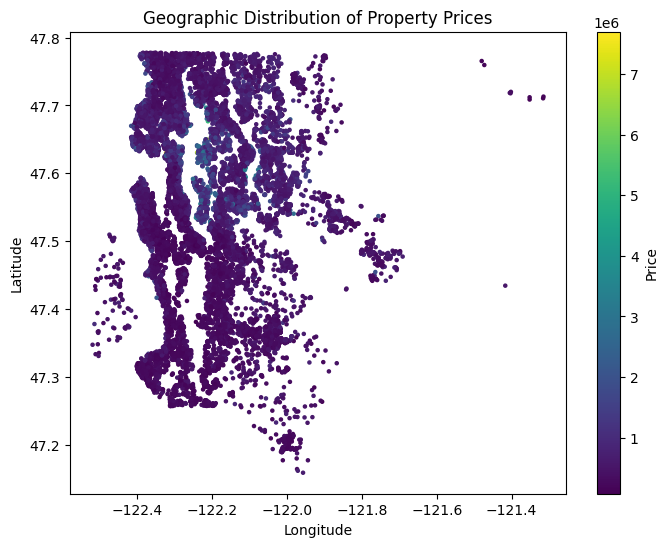

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_train['long'],
    df_train['lat'],
    c=df_train['price'],
    cmap='viridis',
    s=5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Property Prices")
plt.colorbar(label="Price")
plt.show()


Properties with waterfront access have significantly higher median prices compared to non-waterfront properties. The overall price range for waterfront houses is also higher, indicating that proximity to water is a strong factor influencing property value.

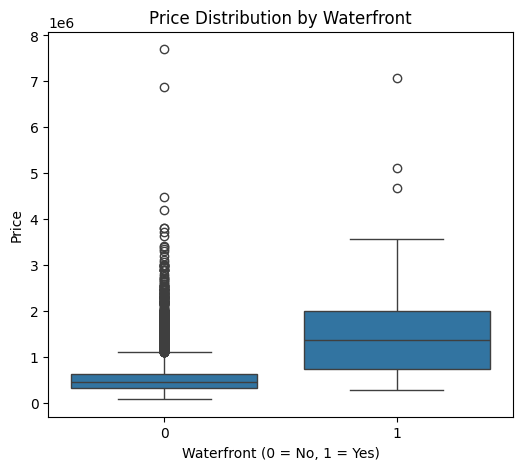

In [95]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df_train['waterfront'], y=df_train['price'])
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.title("Price Distribution by Waterfront")
plt.show()


In [96]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,9117000170,2015-05-05,268643,4,2.25,1810,9240,2.0,0,0,...,0,1961,0,98055,47.4362,-122.187,1660,9240,2015,5
1,6700390210,2014-07-08,245000,3,2.50,1600,2788,2.0,0,0,...,0,1992,0,98031,47.4034,-122.187,1720,3605,2014,7
2,7212660540,2015-01-15,200000,4,2.50,1720,8638,2.0,0,0,...,0,1994,0,98003,47.2704,-122.313,1870,7455,2015,1
3,8562780200,2015-04-27,352499,2,2.25,1240,705,2.0,0,0,...,90,2009,0,98027,47.5321,-122.073,1240,750,2015,4
4,7760400350,2014-12-05,232000,3,2.00,1280,13356,1.0,0,0,...,0,1994,0,98042,47.3715,-122.074,1590,8071,2014,12


This feature directly represents the age of the house at the time of sale, reflecting the general trend that newer homes tend to have higher prices.

In [97]:
df_train['house_age'] = df_train['sale_year'] - df_train['yr_built']
df_test['house_age'] = df_test['sale_year'] - df_test['yr_built']

Instead of using the exact renovation year, a yes/no flag is used to show whether the house was renovated or not. This makes it easier for the model to learn.

In [98]:
df_train['is_renovated'] = (df_train['yr_renovated'] > 0).astype(int)
df_test['is_renovated'] = (df_test['yr_renovated'] > 0).astype(int)

This feature measures land utilization efficiency, where higher ratios generally correspond to better use of space and increased property value.

In [99]:
df_train['living_to_lot_ratio'] = df_train['sqft_living'] / (df_train['sqft_lot'] + 1)
df_test['living_to_lot_ratio'] = df_test['sqft_living'] / (df_test['sqft_lot'] + 1)


Size-related features such as living area and number of rooms were retained as EDA showed a positive relationship with price.

Quality and condition features were retained due to their logical impact on valuation.

Location was captured using latitude and longitude, as EDA showed strong spatial price patterns.

Zipcode was excluded from the baseline model because it is categorical and high-cardinality, and location information is already captured through geographic coordinates and satellite imagery.

Identifier columns were removed as they do not carry predictive information.

In [100]:
selected_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15',
    'sale_year',
    'sale_month',
    'house_age',
    'is_renovated',
    'living_to_lot_ratio'
]

X = df_train[selected_features].copy()
X_test = df_test[selected_features].copy()



The price distribution observed during EDA is highly right-skewed, with a small number of very expensive properties.
To reduce skewness and stabilize variance, I apply a logarithmic transformation to the target variable.
This helps regression models learn more effectively and improves predictive performance.

In [101]:
import numpy as np
# Target variable
y = df_train['price']

# Log-transform the target variable
y_log = np.log1p(y)


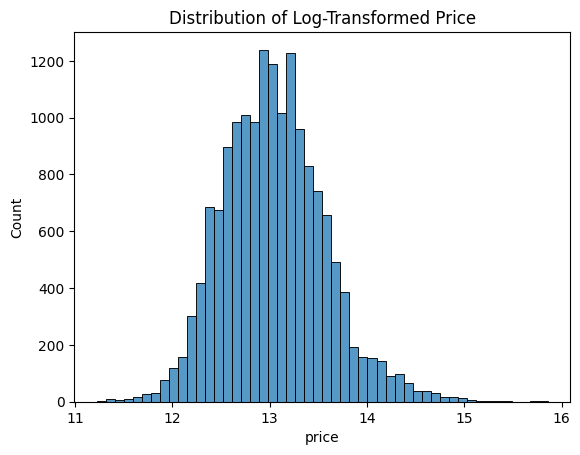

In [102]:
sns.histplot(y_log, bins=50)
plt.title("Distribution of Log-Transformed Price")
plt.show()

In this step, I split the dataset into training and validation sets.
The training set is used to learn model parameters, while the validation set is used to evaluate model performance on unseen data.

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y_log,
    test_size=0.2,
    random_state=42
)


In [104]:
X_train.shape, X_val.shape

((12967, 18), (3242, 18))

In this step, I train a baseline regression model using only tabular features.
This model serves as a reference point to evaluate the impact of adding satellite image features later.

In [105]:
from xgboost import XGBRegressor

# Initialize XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In this step, I evaluate the performance of the tabular baseline model on the validation set using RMSE and R² score.

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set (log space)
y_val_pred_log = xgb_model.predict(X_val)

# Convert predictions back to original price scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

rmse, r2


(np.float64(113767.24251084936), 0.8968592811928465)

In this step, I test the Mapbox Static Images API by downloading a single satellite image using latitude and longitude to ensure the API token and request format work correctly.

In [107]:
import requests
import os

# Create folder to save test image
os.makedirs("images/test_check", exist_ok=True)

# Sample latitude and longitude (take first row from dataset)
lat = df_train.loc[0, 'lat']
lon = df_train.loc[0, 'long']

# Your Mapbox access token
MAPBOX_TOKEN = "pk.eyJ1IjoidmFybmlrYS0xMCIsImEiOiJjbWphODVqcWUwMjh6M2RxbnhxbjFwMmc2In0.vWIUdx6m9IRIkBZ0mZECDA"

# Mapbox Static Images API URL
url = (
    f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
    f"{lon},{lat},16/224x224"
    f"?access_token={MAPBOX_TOKEN}"
)

# Download image
response = requests.get(url)

# Save image
if response.status_code == 200:
    with open("images/test_check/sample.jpg", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully!")
else:
    print("Failed to download image:", response.status_code)


Image downloaded successfully!


To demonstrate the complete multimodal pipeline efficiently, satellite image acquisition and modeling are performed on a representative subset of the dataset.

In [108]:
# Demo size
N_SAMPLES = 500

# Subset dataframe for multimodal demo
df_mm = df_train.iloc[:N_SAMPLES].reset_index(drop=True)

df_mm.shape


(500, 26)

Satellite images are programmatically downloaded for a subset of properties using latitude and longitude via the Mapbox Static Images API.

In [109]:
import requests
import os
from tqdm import tqdm
import time

os.makedirs("images/train_500", exist_ok=True)

MAPBOX_TOKEN = "pk.eyJ1IjoidmFybmlrYS0xMCIsImEiOiJjbWphODVqcWUwMjh6M2RxbnhxbjFwMmc2In0.vWIUdx6m9IRIkBZ0mZECDA"

def download_satellite_image(lat, lon, save_path):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},16/224x224"
        f"?access_token={MAPBOX_TOKEN}"
    )
    r = requests.get(url)
    if r.status_code == 200:
        with open(save_path, "wb") as f:
            f.write(r.content)

for idx, row in tqdm(df_mm.iterrows(), total=N_SAMPLES):
    save_path = f"images/train_500/{idx}.jpg"
    download_satellite_image(row['lat'], row['long'], save_path)
    time.sleep(0.05)


100%|██████████| 500/500 [00:59<00:00,  8.42it/s]


Satellite images are converted into numerical features using a pretrained convolutional neural network. This helps capture visual and environmental information that is not present in tabular data.

A pretrained ResNet18 is employed as a fixed feature extractor, with its final classification layer removed to generate high-level visual embeddings instead of class predictions.

In [110]:
import torch
import torchvision.models as models

# Load pretrained ResNet18
cnn_model = models.resnet18(pretrained=True)

# Remove classification head
cnn_model.fc = torch.nn.Identity()

# Set to evaluation mode
cnn_model.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Images are resized and normalized according to the pretrained CNN’s input format, ensuring stable and consistent feature extraction.

In [111]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In this step, a satellite image is passed through a pretrained CNN to extract high-level visual features. The output is a fixed-length numerical feature vector representing the image.

In [112]:
import torch
from PIL import Image
import numpy as np

# Turn off gradients
torch.set_grad_enabled(False)

# Pick ONE image (index 0)
img_path = "images/train_500/0.jpg"

# Load image
img = Image.open(img_path).convert("RGB")

# Apply preprocessing
img_tensor = transform(img).unsqueeze(0)

# Pass through CNN
features = cnn_model(img_tensor)

# Convert to numpy
features_np = features.squeeze().numpy()

features_np.shape


(512,)

After validating the CNN feature extraction on a single image, I apply the same process to all satellite images in the demo subset to generate image embeddings for multimodal modeling.

In [113]:
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
import os

# Disable gradients
torch.set_grad_enabled(False)

image_embeddings_500 = []
image_dir = "images/train_500"

for idx in tqdm(range(len(df_mm))):
    img_path = os.path.join(image_dir, f"{idx}.jpg")

    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)

    features = cnn_model(img_tensor)
    image_embeddings_500.append(features.squeeze().numpy())

image_embeddings_500 = np.array(image_embeddings_500)

image_embeddings_500.shape


100%|██████████| 500/500 [00:50<00:00,  9.88it/s]


(500, 512)

In this step, tabular features are concatenated with CNN-extracted image embeddings to create a unified multimodal feature representation for each property.

In [114]:
# Select tabular features for demo subset
X_tab_500 = X.iloc[:500].reset_index(drop=True)

X_tab_500.shape


(500, 18)

I used PCA to reduce the dimensionality of CNN image features because the number of image features was too large compared to the dataset size.

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50, random_state=42)
image_embeddings_pca = pca.fit_transform(image_embeddings_500)

image_embeddings_pca.shape


(500, 50)

In [116]:
image_pca_df = pd.DataFrame(image_embeddings_pca)


In [117]:
X_multimodal_500 = pd.concat([X_tab_500, image_pca_df], axis=1)

X_multimodal_500.shape


(500, 68)

In this step, a regression model is trained using the fused tabular and image features to evaluate whether satellite imagery provides additional predictive value beyond structured data alone.

In [118]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Target for demo subset
y_mm_500 = y_log.iloc[:500].reset_index(drop=True)

# Train-validation split
X_mm_train, X_mm_val, y_mm_train, y_mm_val = train_test_split(
    X_multimodal_500,
    y_mm_500,
    test_size=0.2,
    random_state=42
)

# Multimodal model
mm_model_pca = XGBRegressor(
    n_estimators=300,
    max_depth=5,          # slightly reduced depth
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,        # regularization added
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42
)

mm_model_pca.fit(X_mm_train, y_mm_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

After applying PCA, the multimodal model performed better on the validation data. The R² score improved from around 0.65 to around 0.72.

In [119]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict (log scale)
y_pred_log = mm_model_pca.predict(X_mm_val)

# Convert back to price
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_mm_val)

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

rmse, r2


(np.float64(187896.76836732912), 0.7207585367920467)

In this cell, I import all the necessary libraries required for implementing Grad-CAM.
These include PyTorch for deep learning, OpenCV for image processing, NumPy for numerical operations, and Matplotlib for visualization.

In [120]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt


Grad-CAM requires gradient information to understand which parts of the image influence the model. In this cell, gradient computation is enabled and empty lists are created to store activations and gradients from the CNN.

In [121]:
torch.set_grad_enabled(True)

activations = []
gradients = []



Grad-CAM works by capturing:
- Feature maps (activations) during the forward pass
- Gradients during the backward pass

In this cell, I select the last convolutional layer of the CNN and register hooks to store activations and gradients.
This layer captures high-level spatial information from the satellite image.


In [122]:
target_layer = cnn_model.layer4[-1]

def forward_hook(module, input, output):
    activations.append(output)

def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0])

target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)


In this cell, a sample satellite image is loaded and preprocessed.
The image is passed through the CNN to obtain feature representations.

A backward pass is then performed to compute gradients, which are required for generating the Grad-CAM heatmap.



In [123]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = Image.open("images/train_500/0.jpg").convert("RGB")

img_tensor = transform(img).unsqueeze(0)
img_tensor.requires_grad = True

output = cnn_model(img_tensor)
output.mean().backward()


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Using the stored activations and gradients, a Grad-CAM heatmap is computed.
Channel-wise gradient averages are used as weights to highlight important spatial regions.

The resulting heatmap represents areas of the image that most influenced the CNN’s output.


In [124]:
grads = gradients[0].detach().numpy()[0]
acts = activations[0].detach().numpy()[0]

weights = np.mean(grads, axis=(1, 2))

cam = np.zeros(acts.shape[1:], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * acts[i]

cam = np.maximum(cam, 0)
cam /= cam.max()
cam = cv2.resize(cam, (224, 224))


In this cell, the Grad-CAM heatmap is normalized to improve visualization.
Negative values are removed, and the heatmap is resized to match the original image dimensions.
The Grad-CAM heatmap is overlaid on the original satellite image.
This visualization highlights regions such as roads, buildings, and surrounding areas that the model focused on.

This step provides visual explainability for the CNN-based image feature extraction.


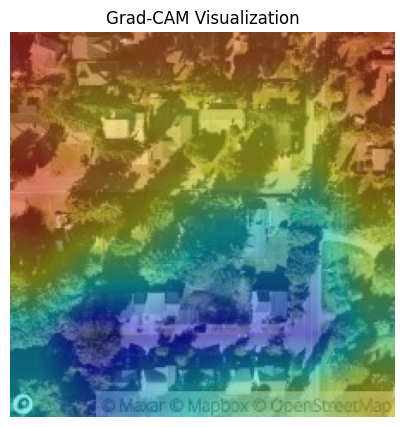

In [125]:
img_np = np.array(img.resize((224, 224)))

heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(5,5))
plt.imshow(overlay)
plt.axis("off")
plt.title("Grad-CAM Visualization")
plt.show()


In [126]:
test_pred_log = xgb_model.predict(X_test)
test_pred_price = np.expm1(test_pred_log)


In [127]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'predicted_price': test_pred_price
})

submission.to_csv("submissions.csv", index=False)
